**Inclass: Data Wrangling and Visualization**

This notebook was made based on main materials `Data Wrangling and Visualization.ipynb`

Version: BRI Audit Analytics - January 2024

---

# Training Objectives

- Reproducible Environment
- Working with Multi-Index DataFrames
    - Subsetting Multi-Index DataFrames
- Visual Data Exploratory
- Using Group By Effectively

# Reproducible Environment

Ada beberapa paket baru yang akan digunakan dalam materi ini. Biasanya, kita dapat menggunakan `pip install`/`conda install` untuk menginstal library baru ke environment kita. Namun untuk saat ini, mari kita coba pendekatan lain dalam mempersiapkan library yang diperlukan untuk proyek tertentu.

Bayangkan Anda sedang bekerja dengan tim Anda dalam sebuah proyek kolaboratif. Anda menginisialisasi proyek dengan dependensi dan versi tertentu di komputer Anda dan semuanya berjalan dengan baik. Nantinya, Anda perlu 'mengirimkan' proyek itu ke tim Anda yang mengharuskan mereka menyiapkan environment yang sama dengan Anda. Lalu apa yang akan Anda lakukan untuk memastikan program itu juga berjalan lancar di mesin mereka?

Di sinilah Anda perlu membuat environment Anda dapat direproduksi dengan membuat file `requirements.txt`.

Lihat pada folder material utama, Anda akan menemukan file `requirements.txt` yang isinya seperti ini:
```
matplotlib==3.8.1
numpy==1.26.1
pandas==2.0.0
yfinance==0.2.31
```

Perhatikan kita memiliki baris untuk setiap library, lalu nomor versi. Hal ini penting karena saat Anda mulai mengembangkan aplikasi python, Anda akan mengembangkan aplikasi dengan mempertimbangkan versi library tertentu. Sederhananya, `requirements.txt` membantu melacak versi setiap library yang Anda gunakan untuk mencegah perubahan yang tidak terduga.

## Importing Requirements

Kita sudah membahas untuk apa file persyaratan itu, tetapi bagaimana cara menggunakannya? Karena kita tidak ingin menginstal dan melacak secara manual setiap library yang diperlukan untuk proyek tertentu, mari kita coba mengimpor persyaratan dengan langkah-langkah berikut:

1. Aktifkan environment yang ingin digunakan: 

    ```
    conda activate <ENV_NAME>
    ```
    
    <div class="alert alert-warning">
    
    <b> Apabila belum ada, maka perlu membuat environment baru:</b><br>

    <code>conda create -n [ENV_NAME] python=[PYTHON_VERSION]</code>

    </div>


    <div class="alert alert-warning">

    <b> Jangan lupa instalasi kernel di dalam environment tersebut apabila ingin dapat diakses menggunakan jupyter notebook:</b><br>

    <code>&gt; pip install ipykernel  </code> 
    
    <code>&gt; python -m ipykernel install --user --name=[ENV_NAME]</code>
    
    </div>


2. Navigasikan path ke folder di mana file `requirements.txt` berada

    ```
    cd <PATH_TO_REQUIREMENTS>
    ```

3. Instalasi packages dari file tersebut

    ```
    pip install -r requirements.txt
    ```

## Exporting Requirements

Perintah `pip install` selalu menginstal versi terbaru dari sebuah library, namun terkadang, Anda mungkin ingin menginstal versi tertentu yang Anda tahu berfungsi pada proyek Anda.

File persyaratan memungkinkan Anda menentukan dengan tepat library dan versi mana yang harus diinstal. Anda dapat mengikuti langkah-langkah berikut untuk membuat file kebutuhan Anda:

1. Aktifkan environment

  ```
  conda activate <ENV_NAME>
  ```

2. Navigasikan path ke folder tempat di mana file `requirements.txt` ingin disimpan

  ```
  cd <PATH_TO_REQUIREMENTS_FOLDER>
  ```

3. Export environment: membuat daftar packages beserta versinya.

  ```
  pip list --format=freeze > requirements.txt
  ```

<div class="alert alert-info">
  <b>Notes!</b>
    <p>Anda dapat menyimpan file dengan nama lain, namun sebagai <b>konvensi</b> biasa digunakan penamaan <code>requirements.txt</code></p>
</div> 

# Data Wrangling dan Reshaping

Pada materi sebelumnya, kita sudah mempelajari beberapa teknik yang biasa digunakan untuk eksplorasi data pada `pandas`. Secara spesifik, pada materi P4DA, berbagai tools yang digunakan untuk inspeksi, diagnostic, dan exploratory yaitu:

**Data Inspection**
- `.head()` and `.tail()`
- `.describe()`
- `.dtypes`
- Subsetting using `.loc`, `.iloc` and conditionals

---

## Load Data

### `yfinance`

Kita akan menggunakan library `yfinance` untuk mengakses data saham yang tersedia pada [Yahoo! Finance](https://finance.yahoo.com/). Penarikan data menggunakan `yfinance` membutuhkan koneksi internet.

Dokumentasi: https://pypi.org/project/yfinance/

In [10]:
import pandas as pd
import yfinance as data
from datetime import date
# Formatting output ke bentuk 2 desimal
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [11]:
symbol = ['BRIS.JK' ,'BBRI.JK', 'BMRI.JK']
start_date = '2020-01-01' # 1 Januari 2020
end_date = date.today() # 4 Januari 2024 hari ini
stock = data.download(tickers = symbol, start = start_date, end = end_date)
stock.columns.names = ['Attributes', 'Symbols']
stock.head()

[*********************100%%**********************]  3 of 3 completed


Attributes Adj Close                   Close                    High          \
Symbols      BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK   
Date                                                                           
2020-01-02   3717.37 3239.33  326.18 4410.00 3875.00  332.00 4410.00 3887.50   
2020-01-03   3725.80 3228.88  322.25 4420.00 3862.50  328.00 4440.00 3912.50   
2020-01-06   3683.65 3176.63  318.32 4370.00 3800.00  324.00 4390.00 3837.50   
2020-01-07   3708.94 3176.63  312.42 4400.00 3800.00  318.00 4410.00 3862.50   
2020-01-08   3692.08 3134.83  306.53 4380.00 3750.00  312.00 4400.00 3775.00   

Attributes             Low                    Open                     Volume  \
Symbols    BRIS.JK BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK BRIS.JK    BBRI.JK   
Date                                                                            
2020-01-02  336.00 4360.00 3825.00  330.00 4400.00 3837.50  330.00   41714100   
2020-01-03  336.00 4390.00 3812.50  326.00 4420.00 3875.00  334.00   82898300   
2020-01-06  334.00 4320.00 3762.50  320.00 4360.00 3825.00  328.00   44225100   
2020-01-07  324.00 4380.00 3787.50  316.00 4410.00 3862.50  324.00  103948100   
2020-01-08  318.00 4340.00 3687.50  312.00 4380.00 3775.00  318.00  171751200   

Attributes                      
Symbols       BMRI.JK  BRIS.JK  
Date                            
2020-01-02   37379800  1456400  
2020-01-03   70294600  4989600  
2020-01-06   61892000  6937900  
2020-01-07   70895600  6319400  
2020-01-08  105080600  4058800

In [12]:
stock.tail()

Attributes Adj Close                   Close                    High          \
Symbols      BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK   
Date                                                                           
2023-12-27   5542.47 6000.00 1695.00 5625.00 6000.00 1695.00 5725.00 6025.00   
2023-12-28   5641.00 6125.00 1740.00 5725.00 6125.00 1740.00 5750.00 6150.00   
2023-12-29   5641.00 6050.00 1740.00 5725.00 6050.00 1740.00 5750.00 6125.00   
2024-01-02   5675.00 6125.00 1740.00 5675.00 6125.00 1740.00 5675.00 6125.00   
2024-01-03   5600.00 6100.00 1800.00 5600.00 6100.00 1800.00 5650.00 6150.00   

Attributes             Low                    Open                     Volume  \
Symbols    BRIS.JK BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK BRIS.JK    BBRI.JK   
Date                                                                            
2023-12-27 1705.00 5625.00 5925.00 1685.00 5700.00 6000.00 1695.00  122236700   
2023-12-28 1745.00 5675.00 6000.00 1685.00 5700.00 6050.00 1695.00  121434600   
2023-12-29 1745.00 5675.00 6000.00 1710.00 5750.00 6125.00 1735.00   93126000   
2024-01-02 1745.00 5625.00 6025.00 1710.00 5650.00 6050.00 1740.00   91143100   
2024-01-03 1830.00 5600.00 6050.00 1730.00 5625.00 6100.00 1735.00   83659700   

Attributes                      
Symbols      BMRI.JK   BRIS.JK  
Date                            
2023-12-27  43114900  10923600  
2023-12-28  75118700  23222700  
2023-12-29  63097100  21099100  
2024-01-02  26235700  13118700  
2024-01-03  30053900  76511200

<button type="button" class="btn btn-primary">Symbols:</button>
- `BRIS.JK` : PT Bank Syariah Indonesia (Persero) Tbk
- `BBRI.JK`: PT Bank Rakyat Indonesia (Persero) Tbk
- `BMRI.JK`: PT Bank Mandiri (Persero) Tbk

<button type="button" class="btn btn-primary">Data description:</button>
- `Date` - tanggal dalam format `yyyy-mm-dd`
- `High` - nilai saham **tertinggi** pada hari tersebut 
- `Low` - nilai saham **terendah** pada hari tersebut
- `Open` - nilai saham saat **trading hours dibuka** pada hari tersebut
- `Close` - nilai saham saat **trading hours ditutup** pada hari tersebut
- `Adj Close` - nilai `Close` yang telah disesuaikan setelah stock split maupun pembagian dividen 
- `Volume` - jumlah lembar saham yang ditransaksikan pada hari tersebut

[Trading hours](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) dapat berbeda-beda pada tiap tempat. Di Indonesia (IDX/BEI), trading hours dibuka pada Senin - Jumat jam 09:00 WIB - 04:00 WIB.

Untuk membuat analisis kedepannya lebih mudah, kita akan melakukan rename kolom pada `Symbols`

In [16]:
stock = stock.rename(columns = {'BRIS.JK' : 'BRIS', 
                                'BBRI.JK': 'BBRI',
                                'BMRI.JK' : 'BMRI'})
stock.head(2)

Attributes Adj Close                  Close                   High          \
Symbols         BBRI    BMRI   BRIS    BBRI    BMRI   BRIS    BBRI    BMRI   
Date                                                                         
2020-01-02   3717.37 3239.33 326.18 4410.00 3875.00 332.00 4410.00 3887.50   
2020-01-03   3725.80 3228.88 322.25 4420.00 3862.50 328.00 4440.00 3912.50   

Attributes            Low                   Open                   Volume  \
Symbols      BRIS    BBRI    BMRI   BRIS    BBRI    BMRI   BRIS      BBRI   
Date                                                                        
2020-01-02 336.00 4360.00 3825.00 330.00 4400.00 3837.50 330.00  41714100   
2020-01-03 336.00 4390.00 3812.50 326.00 4420.00 3875.00 334.00  82898300   

Attributes                     
Symbols         BMRI     BRIS  
Date                           
2020-01-02  37379800  1456400  
2020-01-03  70294600  4989600

## Slicing Multi-Index DataFrame

Multi-Index Dataframe adalah bentuk dataframe yang memiliki level indexing lebih dari 1 baik pada baris, kolom, ataupun keduanya. Hal yang perlu diperhatikan dalam MultiIndex Dataframe adalah bentuk dataframe ini terkadang tidak bisa langsung kita gunakan untuk menganalisis data, sehingga akan ada beberapa perlakuan untuk kita mengiris atau mengubah bentuknya ke dataframe yang lebih sederhana. Berikut contoh bentuk multi-index dataframe:

<img src="assets/multiindex dataframe.png" width = 600>

Perhatikan bahwa data `stock` adalah Multi-Index DataFrame, di mana level dari columnnya terdiri dari:
- `Attributes` = level 0
- `Symbols` = level 1

In [13]:
stock.head()

Attributes Adj Close                   Close                    High          \
Symbols      BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK   
Date                                                                           
2020-01-02   3717.37 3239.33  326.18 4410.00 3875.00  332.00 4410.00 3887.50   
2020-01-03   3725.80 3228.88  322.25 4420.00 3862.50  328.00 4440.00 3912.50   
2020-01-06   3683.65 3176.63  318.32 4370.00 3800.00  324.00 4390.00 3837.50   
2020-01-07   3708.94 3176.63  312.42 4400.00 3800.00  318.00 4410.00 3862.50   
2020-01-08   3692.08 3134.83  306.53 4380.00 3750.00  312.00 4400.00 3775.00   

Attributes             Low                    Open                     Volume  \
Symbols    BRIS.JK BBRI.JK BMRI.JK BRIS.JK BBRI.JK BMRI.JK BRIS.JK    BBRI.JK   
Date                                                                            
2020-01-02  336.00 4360.00 3825.00  330.00 4400.00 3837.50  330.00   41714100   
2020-01-03  336.00 4390.00 3812.50  326.00 4420.00 3875.00  334.00   82898300   
2020-01-06  334.00 4320.00 3762.50  320.00 4360.00 3825.00  328.00   44225100   
2020-01-07  324.00 4380.00 3787.50  316.00 4410.00 3862.50  324.00  103948100   
2020-01-08  318.00 4340.00 3687.50  312.00 4380.00 3775.00  318.00  171751200   

Attributes                      
Symbols       BMRI.JK  BRIS.JK  
Date                            
2020-01-02   37379800  1456400  
2020-01-03   70294600  4989600  
2020-01-06   61892000  6937900  
2020-01-07   70895600  6319400  
2020-01-08  105080600  4058800

> Ketika kita subset menggunakan `[]`, maka kita hanya bisa mengakses kolom dengan **level teratas saja**, yaitu untuk `Attributes`.

❓ Subset pada kolom `High` akan menghasilkan DataFrame Single Index dengan `Symbols` sebagai levelnya

In [19]:
# Ambil kolom High dengan semua attributnya
stock['High']

Symbols,BBRI,BMRI,BRIS
Date,,,
2020-01-02,4410.00,3887.50,336.00
2020-01-03,4440.00,3912.50,336.00
2020-01-06,4390.00,3837.50,334.00
2020-01-07,4410.00,3862.50,324.00
2020-01-08,4400.00,3775.00,318.00
...,...,...,...
2023-12-27,5725.00,6025.00,1705.00
2023-12-28,5750.00,6150.00,1745.00
2023-12-29,5750.00,6125.00,1745.00


❓ **Masalah**: Bagaimana jika kita ingin mengambil semua nilai `Attributes` untuk saham `BRIS`?

In [77]:
# Pake cross section
# stock.xs(key='BRIS', level= 1, axis = 1) 
# Pake loc dan slice
# stock.loc[:, (slice(None), "BRIS")]
# Pake cara swaplevel terlebih dahulu baru panggil BRIS
stock.swaplevel(axis=1)['BRIS']

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,326.18,332.00,336.00,330.00,330.00,1456400
2020-01-03,322.25,328.00,336.00,326.00,334.00,4989600
2020-01-06,318.32,324.00,334.00,320.00,328.00,6937900
2020-01-07,312.42,318.00,324.00,316.00,324.00,6319400
2020-01-08,306.53,312.00,318.00,312.00,318.00,4058800
...,...,...,...,...,...,...
2023-12-27,1695.00,1695.00,1705.00,1685.00,1695.00,10923600
2023-12-28,1740.00,1740.00,1745.00,1685.00,1695.00,23222700
2023-12-29,1740.00,1740.00,1745.00,1710.00,1735.00,21099100


### Cross Section

Menggunakan method `.xs()` (cross section) untuk mengambil kolom (`axis = 1`) pada level dalam. Parameter:

- `key` : nama kolom/baris yang kita ingin ambil
- `level` : kolom/baris tersebut ada di level apa?
- `axis` : levelnya terdapat pada index kolom/baris 
    + `0` untuk baris
    + `1` untuk kolom

In [22]:
stock.head(2)

Attributes Adj Close                  Close                   High          \
Symbols         BBRI    BMRI   BRIS    BBRI    BMRI   BRIS    BBRI    BMRI   
Date                                                                         
2020-01-02   3717.37 3239.33 326.18 4410.00 3875.00 332.00 4410.00 3887.50   
2020-01-03   3725.80 3228.88 322.25 4420.00 3862.50 328.00 4440.00 3912.50   

Attributes            Low                   Open                   Volume  \
Symbols      BRIS    BBRI    BMRI   BRIS    BBRI    BMRI   BRIS      BBRI   
Date                                                                        
2020-01-02 336.00 4360.00 3825.00 330.00 4400.00 3837.50 330.00  41714100   
2020-01-03 336.00 4390.00 3812.50 326.00 4420.00 3875.00 334.00  82898300   

Attributes                     
Symbols         BMRI     BRIS  
Date                           
2020-01-02  37379800  1456400  
2020-01-03  70294600  4989600

In [23]:
# mengambil seluruh nilai BRIS
bris = stock.xs(key='BRIS', level=1, axis=1)

bris

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,326.18,332.00,336.00,330.00,330.00,1456400
2020-01-03,322.25,328.00,336.00,326.00,334.00,4989600
2020-01-06,318.32,324.00,334.00,320.00,328.00,6937900
2020-01-07,312.42,318.00,324.00,316.00,324.00,6319400
2020-01-08,306.53,312.00,318.00,312.00,318.00,4058800
...,...,...,...,...,...,...
2023-12-27,1695.00,1695.00,1705.00,1685.00,1695.00,10923600
2023-12-28,1740.00,1740.00,1745.00,1685.00,1695.00,23222700
2023-12-29,1740.00,1740.00,1745.00,1710.00,1735.00,21099100


### ✅ **Knowledge Check**

Coba ambil seluruh nilai saham BBRI pada tanggal 12 Desember 2022! 

**Hint**: Gunakan metode `.loc` untuk mengambil tanggal yang bersesuaian

In [30]:
# your code here
stock.loc['2022-12-12' ,(slice(None), "BBRI")]

Attributes  Symbols
Adj Close   BBRI           4496.79
Close       BBRI           4850.00
High        BBRI           4850.00
Low         BBRI           4760.00
Open        BBRI           4800.00
Volume      BBRI      139582400.00
Name: 2022-12-12 00:00:00, dtype: float64

**[Extra Challenge]** Ambil history data harga saham BRIS pada 2 minggu terakhir dari data!

In [100]:
from datetime import datetime, timedelta
# your code here
# stock.iloc[-14: ,:].loc[:, (slice(None), "BRIS")]
# Ngambil dari BRIS variabel

checkpoint = (datetime.now() - timedelta(days=14)).strftime('%Y-%m-%d')

bris.loc[checkpoint:]

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-21,1690.00,1690.00,1765.00,1680.00,1765.00,25310000
2023-12-22,1695.00,1695.00,1725.00,1685.00,1690.00,9421600
2023-12-27,1695.00,1695.00,1705.00,1685.00,1695.00,10923600
2023-12-28,1740.00,1740.00,1745.00,1685.00,1695.00,23222700
2023-12-29,1740.00,1740.00,1745.00,1710.00,1735.00,21099100
2024-01-02,1740.00,1740.00,1745.00,1710.00,1740.00,13118700
2024-01-03,1800.00,1800.00,1830.00,1730.00,1735.00,76511200


## Reshaping DataFrames

Reshaping data adalah salah satu komponen penting dalam tahapan data wrangling, karena memungkinkan seorang **analis untuk mempersiapkan data menjadi bentuk yang sesuai untuk tahap analisa data berikutnya**.

## `stack()` and `unstack()`

`stack()` menumpuk level yang ditentukan dari kolom ke indeks dan sangat berguna pada DataFrames yang memiliki kolom multi-level. Ia melakukannya dengan "menggeser" kolom untuk membuat level baru pada indeksnya.

Hal ini lebih mudah dipahami bila kita hanya melihat contohnya. Perhatikan bahwa `stock` memiliki kolom 2 tingkat (Atribut dan Simbol) dan indeks 1 tingkat (Tanggal):

In [43]:
stock.head(2)

Attributes Adj Close                  Close                   High          \
Symbols         BBRI    BMRI   BRIS    BBRI    BMRI   BRIS    BBRI    BMRI   
Date                                                                         
2020-01-02   3717.37 3239.33 326.18 4410.00 3875.00 332.00 4410.00 3887.50   
2020-01-03   3725.80 3228.88 322.25 4420.00 3862.50 328.00 4440.00 3912.50   

Attributes            Low                   Open                   Volume  \
Symbols      BRIS    BBRI    BMRI   BRIS    BBRI    BMRI   BRIS      BBRI   
Date                                                                        
2020-01-02 336.00 4360.00 3825.00 330.00 4400.00 3837.50 330.00  41714100   
2020-01-03 336.00 4390.00 3812.50 326.00 4420.00 3875.00 334.00  82898300   

Attributes                     
Symbols         BMRI     BRIS  
Date                           
2020-01-02  37379800  1456400  
2020-01-03  70294600  4989600

Saat kita menumpuk `stock` DataFrame, kita mengecilkan jumlah level pada kolomnya sebanyak satu: `stock` sekarang memiliki 1 kolom level bernama `Attributes`:

In [44]:
stock.stack()

Attributes          Adj Close   Close    High     Low    Open    Volume
Date       Symbols                                                     
2020-01-02 BBRI       3717.37 4410.00 4410.00 4360.00 4400.00  41714100
           BMRI       3239.33 3875.00 3887.50 3825.00 3837.50  37379800
           BRIS        326.18  332.00  336.00  330.00  330.00   1456400
2020-01-03 BBRI       3725.80 4420.00 4440.00 4390.00 4420.00  82898300
           BMRI       3228.88 3862.50 3912.50 3812.50 3875.00  70294600
...                       ...     ...     ...     ...     ...       ...
2024-01-02 BMRI       6125.00 6125.00 6125.00 6025.00 6050.00  26235700
           BRIS       1740.00 1740.00 1745.00 1710.00 1740.00  13118700
2024-01-03 BBRI       5600.00 5600.00 5650.00 5600.00 5625.00  83659700
           BMRI       6100.00 6100.00 6150.00 6050.00 6100.00  30053900
           BRIS       1800.00 1800.00 1830.00 1730.00 1735.00  76511200

[2928 rows x 6 columns]

`unstack()` melakukan yang sebaliknya: ia "menggeser" level dari sumbu indeks ke sumbu kolom. **Coba dan buat tumpukan DataFrame, lalu terapkan `unstack` pada DataFrame baru untuk melihatnya kembali ke bentuk aslinya:**

In [45]:
## Write your code to try out .unstack() method here
stock.unstack()

Attributes  Symbols  Date      
Adj Close   BBRI     2020-01-02       3717.37
                     2020-01-03       3725.80
                     2020-01-06       3683.65
                     2020-01-07       3708.94
                     2020-01-08       3692.08
                                      ...    
Volume      BRIS     2023-12-27   10923600.00
                     2023-12-28   23222700.00
                     2023-12-29   21099100.00
                     2024-01-02   13118700.00
                     2024-01-03   76511200.00
Length: 17568, dtype: float64

**Dive Deeper**

Jawablah pertanyaan-pertanyaan berikut ini untuk memastikan Anda dapat melanjutkan sesi berikutnya:

1. Bagaimana cara menukar posisi (level) Symbols dan Attributes?

2. Berdasarkan pengetahuan Anda, (simbol) perusahaan apa yang layak untuk diinvestasikan? 
(Anda dapat melihat fluktuasinya, artinya, dll)

<!--
# answer 1
stock.stack(level=0).unstack(level=1)

# answer 2
# Overal Growth Values
stock['Close'].iloc[-1,:] - stock['Close'].iloc[0,:]

# Oveal Growth Percentage
(stock['Close'].iloc[-1,:] - stock['Close'].iloc[0,:]) / stock['Close'].iloc[0,:]

# Standard Deviation 
stock['Close'].std() / stock['Close'].mean()
-->

In [49]:
# Write your solution code here 
stock.swaplevel(axis=1)

Symbols,BBRI,BMRI,BRIS,BBRI,BMRI,BRIS,BBRI,BMRI,BRIS,BBRI,BMRI,BRIS,BBRI,BMRI,BRIS,BBRI,BMRI,BRIS
Attributes,Adj Close,Adj Close,Adj Close,Close,Close,Close,High,High,High,Low,Low,Low,Open,Open,Open,Volume,Volume,Volume
Date,,,,,,,,,,,,,,,,,,
2020-01-02,3717.37,3239.33,326.18,4410.00,3875.00,332.00,4410.00,3887.50,336.00,4360.00,3825.00,330.00,4400.00,3837.50,330.00,41714100,37379800,1456400
2020-01-03,3725.80,3228.88,322.25,4420.00,3862.50,328.00,4440.00,3912.50,336.00,4390.00,3812.50,326.00,4420.00,3875.00,334.00,82898300,70294600,4989600
2020-01-06,3683.65,3176.63,318.32,4370.00,3800.00,324.00,4390.00,3837.50,334.00,4320.00,3762.50,320.00,4360.00,3825.00,328.00,44225100,61892000,6937900
2020-01-07,3708.94,3176.63,312.42,4400.00,3800.00,318.00,4410.00,3862.50,324.00,4380.00,3787.50,316.00,4410.00,3862.50,324.00,103948100,70895600,6319400
2020-01-08,3692.08,3134.83,306.53,4380.00,3750.00,312.00,4400.00,3775.00,318.00,4340.00,3687.50,312.00,4380.00,3775.00,318.00,171751200,105080600,4058800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,5542.47,6000.00,1695.00,5625.00,6000.00,1695.00,5725.00,6025.00,1705.00,5625.00,5925.00,1685.00,5700.00,6000.00,1695.00,122236700,43114900,10923600
2023-12-28,5641.00,6125.00,1740.00,5725.00,6125.00,1740.00,5750.00,6150.00,1745.00,5675.00,6000.00,1685.00,5700.00,6050.00,1695.00,121434600,75118700,23222700


In [51]:
stock.groupby(level = 1, axis = 1).describe()

count         mean          std         min  \
Symbols Attributes Symbols                                                
BBRI    Adj Close  BBRI    976.00      3983.76       825.93     1893.82   
        Close      BBRI    976.00      4341.34       734.56     2170.00   
        High       BBRI    976.00      4394.92       727.07     2270.00   
        Low        BBRI    976.00      4293.33       737.23     2160.00   
        Open       BBRI    976.00      4347.60       731.63     2250.00   
        Volume     BBRI    976.00 162823853.00  99249723.95 27676500.00   
BMRI    Adj Close  BMRI    976.00      3723.45      1214.71     1633.40   
        Close      BMRI    976.00      3974.56      1110.13     1860.00   
        High       BMRI    976.00      4024.61      1110.79     1900.00   
        Low        BMRI    976.00      3925.31      1106.74     1830.00   
        Open       BMRI    976.00      3977.00      1106.57     1880.00   
        Volume     BMRI    976.00 105844761.99  65129933.21        0.00   
BRIS    Adj Close  BRIS    976.00      1500.02       671.26      132.63   
        Close      BRIS    976.00      1517.88       682.52      135.00   
        High       BRIS    976.00      1555.41       705.24      155.00   
        Low        BRIS    976.00      1489.19       665.76      135.00   
        Open       BRIS    976.00      1519.86       684.72      136.00   
        Volume     BRIS    976.00  66363241.09 124768967.30   664700.00   

                                   25%          50%          75%           max  
Symbols Attributes Symbols                                                      
BBRI    Adj Close  BBRI        3530.16      3950.26      4450.15       5675.00  
        Close      BBRI        3997.50      4400.00      4772.50       5725.00  
        High       BBRI        4070.00      4440.00      4820.00       5750.00  
        Low        BBRI        3930.00      4350.00      4722.50       5675.00  
        Open       BBRI        4000.00      4400.00      4780.00       5750.00  
        Volume     BBRI    99034175.00 136537400.00 191963800.00  898453700.00  
BMRI    Adj Close  BMRI        2775.37      3280.89      4780.97      10225.00  
        Close      BMRI        3075.00      3775.00      5015.62      10225.00  
        High       BMRI        3125.00      3837.50      5075.00      10400.00  
        Low        BMRI        3046.88      3750.00      4975.00      10225.00  
        Open       BMRI        3087.50      3793.75      5025.00      10350.00  
        Volume     BMRI    64435950.00  91211050.00 131406100.00  770252400.00  
BRIS    Adj Close  BRIS        1310.69      1561.67      1790.75       3703.88  
        Close      BRIS        1318.75      1580.00      1810.00       3770.00  
        High       BRIS        1350.00      1607.50      1848.75       3980.00  
        Low        BRIS        1300.00      1550.00      1780.00       3710.00  
        Open       BRIS        1315.00      1580.00      1805.00       3800.00  
        Volume     BRIS    10885025.00  23884104.00  60038475.00 1318651800.00

## Sepertinya saham BBRI paling GACOR !!! Karena selisih high and low secara median dan mean yang cukup bagus, std tidak begitu variatif jadi lebih stabil dan volume yang tinggi sehingga lebih dipercaya masyarakat

### `melt()`

**Goal**: Melebur beberapa kolom menjadi 1 kolom (variabel) dan nilai di dalamnnya menjadi value

> Syntax: `Dataframe.melt()`

<img src="assets/reshaping_melt.png" width="600"/>

❓ Dari dataframe `bris` hasil metode cross section (`xs`) sebelumnya, aplikasikan method `melt()`!

In [52]:
# dataframe bris
bris

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,326.18,332.00,336.00,330.00,330.00,1456400
2020-01-03,322.25,328.00,336.00,326.00,334.00,4989600
2020-01-06,318.32,324.00,334.00,320.00,328.00,6937900
2020-01-07,312.42,318.00,324.00,316.00,324.00,6319400
2020-01-08,306.53,312.00,318.00,312.00,318.00,4058800
...,...,...,...,...,...,...
2023-12-27,1695.00,1695.00,1705.00,1685.00,1695.00,10923600
2023-12-28,1740.00,1740.00,1745.00,1685.00,1695.00,23222700
2023-12-29,1740.00,1740.00,1745.00,1710.00,1735.00,21099100


DataFrame di atas memiliki format *wide*: terdiri dari __ baris dan 6 kolom. Fungsi `melt()` menggabungkan semua kolom menjadi satu dan menyimpan nilai yang sesuai dengan masing-masing kolom, sehingga DataFrame yang dihasilkan memiliki ___ * 6 = 5.382 baris. Selain itu, DataFrame ini juga memiliki kolom `Attributes` dan kolom `value`.

In [53]:
# your code here
bris.melt()

,Attributes,value
0,Adj Close,326.18
1,Adj Close,322.25
2,Adj Close,318.32
3,Adj Close,312.42
4,Adj Close,306.53
...,...,...
5851,Volume,10923600.00
5852,Volume,23222700.00
5853,Volume,21099100.00
5854,Volume,13118700.00


Data di atas kurang informatif sebab kita tidak tahu kapan nilai-nilai tersebut muncul. Hal ini dikarenakan `Date` merupakan index baris.

❓ Bagaimana jika kita ingin Date tetap dimunculkan? Kita perlu mengubah `Date` dari index menjadi kolom

#### Identifier and Value

Dalam method `melt()`, terdapat dua parameter yang sering digunakan:
- `id_vars`: kolom yang dipertahankan
- `value_vars`: kolom yang di-melt


In [58]:
# menggunakan reset_index() sehingga Date menjadi kolom
stock_kopi = stock.reset_index().copy()
stock_kopi.tail(5)

Attributes       Date Adj Close                   Close                  \
Symbols                    BBRI    BMRI    BRIS    BBRI    BMRI    BRIS   
971        2023-12-27   5542.47 6000.00 1695.00 5625.00 6000.00 1695.00   
972        2023-12-28   5641.00 6125.00 1740.00 5725.00 6125.00 1740.00   
973        2023-12-29   5641.00 6050.00 1740.00 5725.00 6050.00 1740.00   
974        2024-01-02   5675.00 6125.00 1740.00 5675.00 6125.00 1740.00   
975        2024-01-03   5600.00 6100.00 1800.00 5600.00 6100.00 1800.00   

Attributes    High                     Low                    Open          \
Symbols       BBRI    BMRI    BRIS    BBRI    BMRI    BRIS    BBRI    BMRI   
971        5725.00 6025.00 1705.00 5625.00 5925.00 1685.00 5700.00 6000.00   
972        5750.00 6150.00 1745.00 5675.00 6000.00 1685.00 5700.00 6050.00   
973        5750.00 6125.00 1745.00 5675.00 6000.00 1710.00 5750.00 6125.00   
974        5675.00 6125.00 1745.00 5625.00 6025.00 1710.00 5650.00 6050.00   
975        5650.00 6150.00 1830.00 5600.00 6050.00 1730.00 5625.00 6100.00   

Attributes             Volume                      
Symbols       BRIS       BBRI      BMRI      BRIS  
971        1695.00  122236700  43114900  10923600  
972        1695.00  121434600  75118700  23222700  
973        1735.00   93126000  63097100  21099100  
974        1740.00   91143100  26235700  13118700  
975        1735.00   83659700  30053900  76511200

📌 Note: 

Fungsi `reset_index` di Pandas digunakan untuk mengembalikan indeks dari DataFrame atau Series ke indeks default yang berurutan (0, 1, 2, ...) dan menghapus indeks yang sudah ada

In [59]:
# reset index & melt
stock_kopi.melt()

,Attributes,Symbols,value
0,Date,,2020-01-02 00:00:00
1,Date,,2020-01-03 00:00:00
2,Date,,2020-01-06 00:00:00
3,Date,,2020-01-07 00:00:00
4,Date,,2020-01-08 00:00:00
...,...,...,...
18539,Volume,BRIS,10923600
18540,Volume,BRIS,23222700
18541,Volume,BRIS,21099100
18542,Volume,BRIS,13118700


In [60]:
# id_vars
stock_kopi.melt(id_vars=['Date'])

,Date,Attributes,Symbols,value
0,2020-01-02,Adj Close,BBRI,3717.37
1,2020-01-03,Adj Close,BBRI,3725.80
2,2020-01-06,Adj Close,BBRI,3683.65
3,2020-01-07,Adj Close,BBRI,3708.94
4,2020-01-08,Adj Close,BBRI,3692.08
...,...,...,...,...
17563,2023-12-27,Volume,BRIS,10923600.00
17564,2023-12-28,Volume,BRIS,23222700.00
17565,2023-12-29,Volume,BRIS,21099100.00
17566,2024-01-02,Volume,BRIS,13118700.00


❓ Lakukan melt terhadap data `bris` hanya pada kolom `Close` dan `Open`, serta setiap observasinya dibedakan berdasarkan `Date`.

In [69]:
bris.reset_index().melt(id_vars=['Date'], value_vars=['Close', 'Open'])

,Date,Attributes,value
0,2020-01-02,Close,332.00
1,2020-01-03,Close,328.00
2,2020-01-06,Close,324.00
3,2020-01-07,Close,318.00
4,2020-01-08,Close,312.00
...,...,...,...
1947,2023-12-27,Open,1695.00
1948,2023-12-28,Open,1695.00
1949,2023-12-29,Open,1735.00
1950,2024-01-02,Open,1740.00


# Visualisasi Data

Tujuan visualisasi: 
- **Exploratory**: proses **mengeksplorasi data** untuk **mendapatkan sebuah insight**. 
    + Visualisasi yang ditampilkan sederhana
    + Analogi: mencari dan mendapatkan batu permata di antara ratusan batu biasa

- **Explanatory**: proses untuk menjelaskan atau **menyajikan insight** (*explain*) yang didapat dari hasil exploratory kepada audience.
    + Visualisasi biasanya lebih menarik
    + Visualisasi meng-*highlight* insight secara spesifik
    + Analogi: mempoles batu permata dan menawarkannya kepada pembeli
    
Pada course ini, dititikberatkan pada visualisasi untuk eksplorasi, yaitu menampilkan visualisasi data yang **informatif dan tepat** sehingga mendapatkan insight.

## `Pandas` dan `Matplotlib`

Sampai tahap ini mungkin Anda tidak sabar untuk melakukan visualisasi data di Python. Dengan cukup mudah, kita bisa membuat objek plot `matplotlib` dengan hanya menggunakan method `.plot()`

❗️ Sekarang mari kita coba melakukan visualisasi untuk **50 observasi (baris) terakhir `Volume` pada `stock`**

- Index akan menjadi sumbu horizontal pada plot (`Date`)
- Nilai akan menjadi sumbu vertikal pada plot
- Masing-masing kolom akan menjadi 1 komponen pada plot, dalam hal ini 1 `Symbols` menjadi 1 garis

In [70]:
stock['Volume']

Symbols,BBRI,BMRI,BRIS
Date,,,
2020-01-02,41714100,37379800,1456400
2020-01-03,82898300,70294600,4989600
2020-01-06,44225100,61892000,6937900
2020-01-07,103948100,70895600,6319400
2020-01-08,171751200,105080600,4058800
...,...,...,...
2023-12-27,122236700,43114900,10923600
2023-12-28,121434600,75118700,23222700
2023-12-29,93126000,63097100,21099100


<Axes: xlabel='Date'>

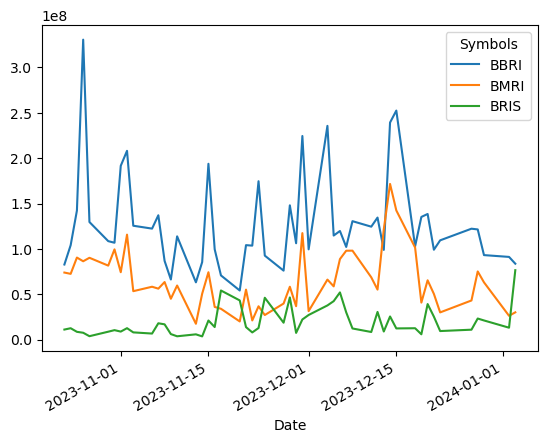

In [78]:
# ambil 50 data terakhir dari kolom Volume kemudian lakukan .plot()
stock['Volume'].tail(50).plot()

📈 **Insight**:

- 
- 

🔻 Method `plot()` mempermudah kita dalam melakukan visualisasi langsung pada DataFrame, tanpa perlu mengerti cara penggunaan `matplotlib`. Kunjungi [dokumentasi matplotlib](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) untuk detail mengenai `matplotlib`.

🔻 Namun, keterbatasan dari penggunaan `plot()` adalah minim kustomisasi dari visualisasi yang ada. Hanya terbatas pada parameter yang ada di dalam method tersebut. Kunjungi [dokumentasi method plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

🔻 Salah satu kustomisasi yang dapat kita lakukan untuk memperindah visualisasi adalah melalui [matplotlib style sheet](https://matplotlib.org/stable/tutorials/introductory/customizing.html). Kita dapat mengganti nilai 'default' pada method `plt.style.use()` dengan salah satu style yang tersedia, kemudian jalankan kembali code visualisasi untuk menerapkan style yang dipilih.

In [79]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [80]:
# misalnya gunakan style seaborn-v0_8
plt.style.use('seaborn-v0_8-white')

<Axes: xlabel='Date'>

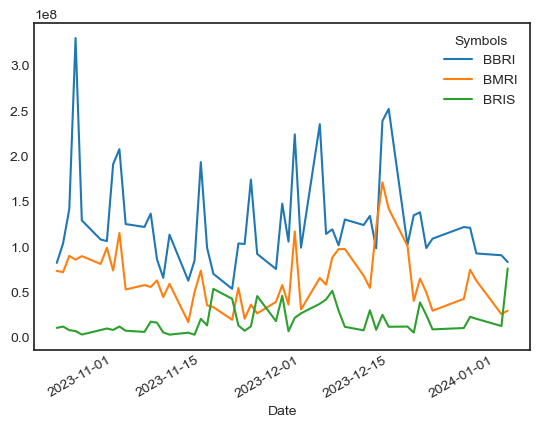

In [81]:
# ambil 50 data terakhir dari kolom Volume kemudian lakukan .plot()
stock['Volume'].tail(50).plot()

🧐 **Task**: Ambil data BRIS untuk tanggal 8 September 2022 s.d. 8 September 2023 dan assign ke variabel `bris_sept`. Setelah itu lakukan visualisasi dari data `bris_sept` tersebut.

*Hint: gunakan `.loc[start_date : end_date]`*

In [82]:
bris.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-12-27,1695.00,1695.00,1705.00,1685.00,1695.00,10923600
2023-12-28,1740.00,1740.00,1745.00,1685.00,1695.00,23222700
2023-12-29,1740.00,1740.00,1745.00,1710.00,1735.00,21099100
2024-01-02,1740.00,1740.00,1745.00,1710.00,1740.00,13118700
2024-01-03,1800.00,1800.00,1830.00,1730.00,1735.00,76511200


<Axes: xlabel='Date'>

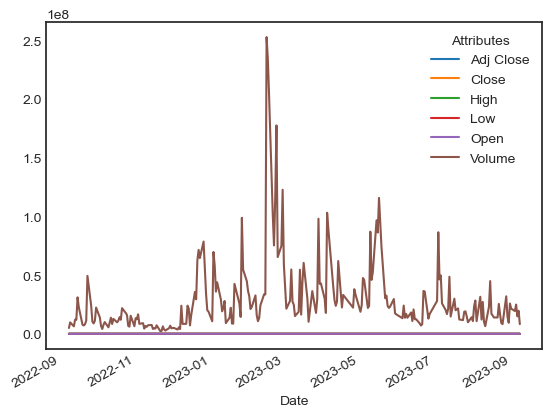

In [85]:
# gunakan .loc untuk mensubset tanggal
bris_sept = bris.loc['2022-09-08':'2023-09-08']

# melakukan visualisasi
bris_sept.plot()

💭 **Diskusi:** Apakah visualisasi tersebut sudah cukup informatif dan tepat? 

## Kurang detail untuk nominalnya karena nilai dari volume terlalu tinggi dibanding yang lain

## 📌 Types of Visualization

Visualisasi berikut hanya perlu menggunakan **satu** kolom:

- Data kategorik:
    - **`.plot(kind='bar')` untuk barplot (diagram batang)**
    - **`.plot(kind='barh')` untuk horizontal barplot**
    - **`.plot(kind='box')` untuk boxplot (five number summary)** 
    - `.plot(kind='pie')` untuk pie chart
    

- Data numerik:
    - **`.plot(kind='hist')` untuk histogram**
    - `.plot(kind='density')` untuk density plot
    - `.plot(kind='area')` untuk area plot

Visualisasi berikut perlu menggunakan **dua** kolom:

- `.plot(kind='scatter')` untuk scatter plot
- `.plot(kind='hexbin')` untuk hexagonal bin plot

💡 Panduan untuk menentukan tipe visualisasi yang tepat: https://www.data-to-viz.com/

Silakan mengacu referensi lengkapnya di [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) untuk method `plot` apabila ingin eksplor visualisasi yang ada di luar lingkup course ini

### 📊 Barplot

> Visualisasi untuk melihat perbandingan nilai dari beberapa kategori

❓ Menggunakan data `stock`, tampilkan visualisasi untuk **membandingkan** fluktuasi (menggunakan coefficient of variance) nilai `Close` pada masing-masing `Symbols`. **Mana saham yang paling berfluktuasi?**

Info lebih lanjut terkait [coefficient of variance](https://www.investopedia.com/terms/c/coefficientofvariation.asp)

In [86]:
# mengambil nilai coefficient of variation
coef_of_var = stock['High'].std() / stock['High'].mean()
coef_of_var

Symbols
BBRI   0.17
BMRI   0.28
BRIS   0.45
dtype: float64

<Axes: xlabel='Symbols'>

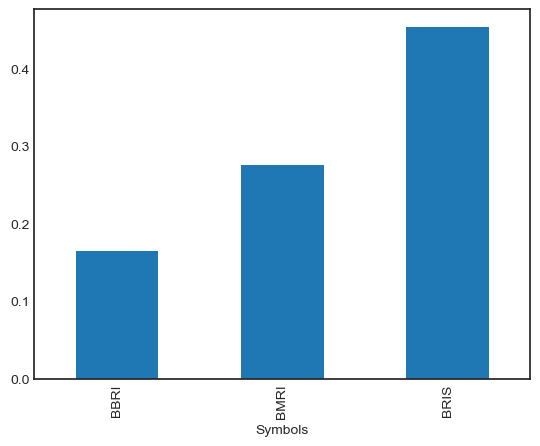

In [87]:
# Visualisasi barplot
coef_of_var.plot(kind='bar')

📈 **Insight**:

> ...

<Axes: xlabel='Symbols'>

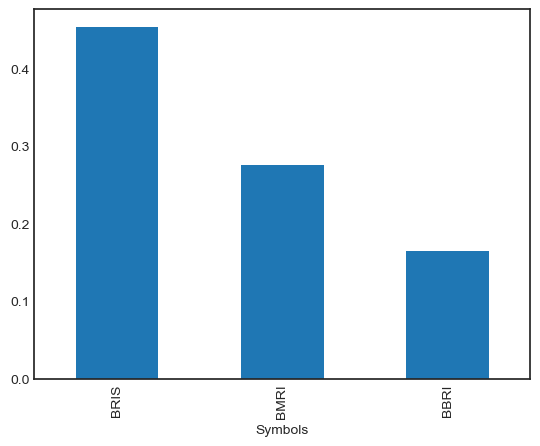

In [89]:
# (opsional) ingin diurutkan
coef_of_var.sort_values(ascending = False).plot(kind='bar')

### Histogram

> Visualisasi untuk melihat persebaran data

Menggunakan data `bbri`, tampilkan visualisasi histogram untuk mengetahui **persebaran** `Volume` pada saham `BBRI`:

In [94]:
# slicing volume BBRI, masukan ke variabel vol_bbri
bbri = stock['Volume']['BBRI']

<Axes: ylabel='Frequency'>

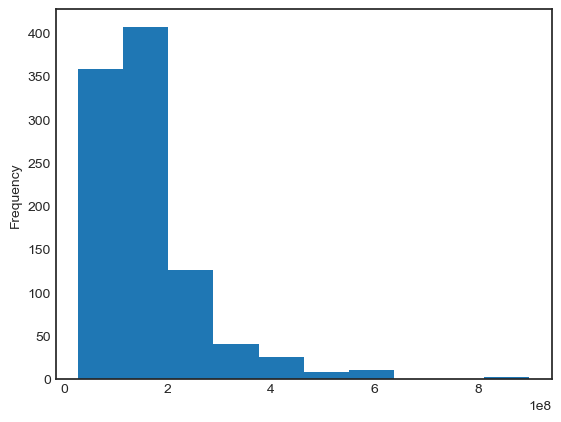

In [95]:
# visualisasi
bbri.plot(kind='hist')

📈 **Insight**:

- Transaksi terbanyak terjadi di ...
- 

# Group By: Aggregation Table

Teknik yang tak kalah penting adalah operasi **group by**. Mungkin untuk Anda yang sudah pernah menggunakan SQL akan familiar dengan operasi group by ini.

❗️ Misalkan kita punya dataframe `close_melted` yang ingin kita bandingkan nilai `Close` hariannya pada saham BRIS, BBRI, dan BMRI:

In [ ]:
close = stock['Close']
close_melted = close.reset_index().melt(id_vars = 'Date', value_name = 'Close')
close_melted

❓ Di antara saham BRIS, BBRI, maupun BMRI, manakah saham yang memiliki rata-rata `Close` harian tertinggi? 

Cobalah preprocessing datanya menggunakan `.groupby()`.

Syntax: `[df_name].groupby(by=[column_name]).aggfunc_name()`

In [ ]:
# coba pakai method yang sudah dipelajari


In [ ]:
# coba pakai groupby
avg_close = close_melted.groupby(by = 'Symbols').mean()['Close']
avg_close

In [ ]:
# visualisasi bar chart
avg_close.plot(kind = 'bar')

## Grouped Bar Chart

Kita akan coba melakukan visualisasi **grouped bar chart** untuk membandingkan rata-rata nilai `Close` untuk ketiga saham **setiap bulannya**

1️⃣ Step 1: Panggil kembali dataframe `close` yang sudah dibuat sebelumnya

In [ ]:
# dataframe close


2️⃣ Step 2: Buatlah kolom `Month` yang berisikan nama bulan pada dataframe `close`

📌 Note: untuk mengambil nama bulan tidak perlu `.dt` lagi, karena sudah berupa objek DatetimeIndex. Jika date ada di dalam kolom maka perlu menggunakan `.dt`

In [ ]:
close['Month'] = close.index.month_name()

close.head()

3️⃣ Step 3: Membuat `.groupby()` untuk mendapatkan mean Close tiap bulan

4️⃣ Step 4: Visualisasikan group barchart

In [ ]:
# visualisasi barchart


5️⃣ Step 5: Improvement Visualisasi

In [ ]:
# perbaiki urutan bulan
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

mean_closing.loc[months,].plot(kind='bar')

## Menggabungkan `agg` dan `groupby`

In [ ]:
stock_long = stock.stack().reset_index()
stock_long

Misalkan kita ingin membuat tabel agregasi dengan `aggfunc` yang berbeda-beda untuk masing-masing `Symbols` berupa:
- Maximum `stock` price (`max` dari `High`)
- Minimum `stock` price (`min` dari `Low`)
- Rata-rata closing price (`mean` dari `Close`)

Untuk mendapat hasil tersebut, kita harus melakukan chaining `groupby` dengan method `agg`. Kita harus menyertakan mapping (**dictionary**) untuk setiap kolom dengan fungsi agregasinya seperti berikut ini:

Syntax:

```
.agg({
    'NAMA_KOLOM': 'FUNGSI_AGREGASI'
})
```

In [ ]:
summary_stock = stock_long.groupby('Symbols').agg({
    'High' : 'max',
    'Low' : 'min',
    'Close' : 'mean'
})
summary_stock

❓ Visualisasikan tabel agregasi di atas untuk membandingkan nilai tersebut.

In [ ]:
# visualisasi
